Combining Meta-data and review data

Subsetting: https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria \
replacing values: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html \
Lemmatization: https://stackoverflow.com/questions/47498293/how-to-lemmatize-strings-in-pandas-dataframes \
stopword removal: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe \
adding own stopwords: https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn \
cleaning text: https://www.youtube.com/watch?v=8Fw1nh8lR54 \
NA values: https://sparkbyexamples.com/pandas/count-nan-values-in-pandas/#:~:text=Count%20NaN%20Value%20in%20the,values%20in%20the%20entire%20DataFrame. \
character count: https://stackoverflow.com/questions/41243263/count-number-of-characters-in-a-string-create-a-data-frame-column-out-of-it

In [101]:
import pandas
import numpy as np
import copy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

In [103]:
#loading in the two review datasets and the metadata dataset
review1 = pandas.read_csv("G:\Master\Block 3\Thesis proposal\Scripts new\dataset.csv")
meta_data = pandas.read_csv("G:\Master\Block 3\Thesis proposal\Scripts new\Metadata.csv", sep = ";")

C:\Users\victo\AppData\Local\Temp\ipykernel_30896\3609798373.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data = pandas.read_csv("G:\Master\Block 3\Thesis proposal\Scripts new\Metadata.csv", sep = ";")


In [104]:
#checking the first 5 rows of every dataset
print(review1.head())
print(meta_data.head())

#checking all the columns of the dataset to determine which ones to drop
print(review1.columns)
print(meta_data.columns)



   app_id        app_name                                        review_text  \
0      10  Counter-Strike                                    Ruined my life.   
1      10  Counter-Strike  This will be more of a ''my experience with th...   
2      10  Counter-Strike                      This game saved my virginity.   
3      10  Counter-Strike  • Do you like original games? • Do you like ga...   
4      10  Counter-Strike           Easy to learn, hard to master.             

   review_score  review_votes  
0             1             0  
1             1             1  
2             1             0  
3             1             0  
4             1             1  
    App ID                         Name  \
0       10               Counter-Strike   
1  1000000                    ASCENXION   
2  1000010                  Crown Trick   
3  1000030  Cook, Serve, Delicious! 3?!   
4  1000040                         细胞战争   

                                   Short Description               D

In [105]:
# dropping columns 
review1 = review1.drop(["review_votes", "app_name"], axis = 1)


#Choosing columns in metadata dataset
meta_data = meta_data[["App ID"]]


In [106]:
#Making the positive class the minority class (negative reviews), thus making the positive class the negative class
review1["review_score"].value_counts()


review1["review_score"] = review1["review_score"].replace(1,0)
review1["review_score"] = review1["review_score"].replace(-1,1)

In [107]:
#merging the metadata with the dataset of the reviews
complete = review1.merge(meta_data, 'inner', left_on='app_id', right_on= "App ID")
complete = complete.drop("App ID", axis=1)

#checking NA
NA_review = complete["review_text"].isna().sum()
print(NA_review)

#remove NA values
complete = complete[complete["review_text"].notna()]

#add column with character count
#complete["character count"] = complete["review_text"].str.len()

7066


In [ ]:
#checking column numbers
complete

In [108]:
#dropping all reviews which have lower than 201 characters
Complete_600 = complete[complete['review_text'].apply(lambda x: len(str(x)) <=200)]

In [31]:
Complete_600

,app_id,app_name,review_text,review_score,Tags,character count
0,10,Counter-Strike,Ruined my life.,0,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",15
2,10,Counter-Strike,This game saved my virginity.,0,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",29
4,10,Counter-Strike,"Easy to learn, hard to master.",0,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",48
5,10,Counter-Strike,"No r8 revolver, 10/10 will play again.",0,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",38
6,10,Counter-Strike,Still better than Call of Duty: Ghosts...,0,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",41
...,...,...,...,...,...,...
6193796,99910,Puzzle Pirates,"Was fun for the first 30 minutes or so, got bo...",1,"Free to Play: 117, Massively Multiplayer: 90, ...",111
6193797,99910,Puzzle Pirates,The game is very awefull and strange. I think ...,1,"Free to Play: 117, Massively Multiplayer: 90, ...",99
6193798,99910,Puzzle Pirates,"A very good game, got sick of it after a while...",1,"Free to Play: 117, Massively Multiplayer: 90, ...",66
6193799,99910,Puzzle Pirates,Imagine Bejeweled with a heavy grind based eco...,1,"Free to Play: 117, Massively Multiplayer: 90, ...",65


In [109]:
Complete_600["review_score"].value_counts()

0    3418385
1     631578
Name: review_score, dtype: int64

In [110]:
#Dropping early acces reviews https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/
Complete_600 = Complete_600[Complete_600["review_text"].str.contains("early access review", case = False) == False]

In [111]:
#adding Index 
Complete_600["Index"] = Complete_600.index

In [112]:
df_undersampled = Complete_600.groupby("review_score").sample(n=15000, random_state = 101)

In [113]:
df_undersampled["review_score"].value_counts()

0    15000
1    15000
Name: review_score, dtype: int64

In [114]:
#seperating dataset for CTM and BerTopic
Dataset_Bert = df_undersampled
Dataset_CTM = copy.deepcopy(df_undersampled)



Text Cleaning

C:\Users\victo\AppData\Local\Temp\ipykernel_30896\228166164.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  Dataset_CTM["review_text"] = Dataset_CTM["review_text"].str.replace('[^\w\s]','')
C:\Users\victo\AppData\Local\Temp\ipykernel_30896\228166164.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  Dataset_CTM["review_text"]  = Dataset_CTM["review_text"].str.replace('\d+', '')


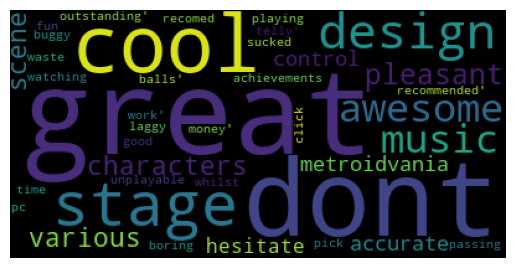

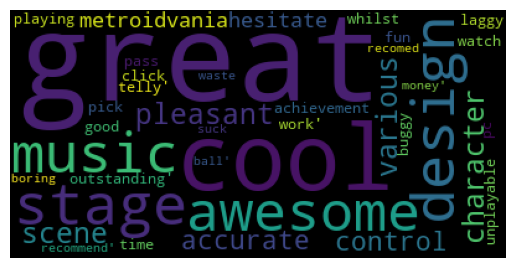

In [115]:

#cleaning data: removing capital letters 
Dataset_CTM["review_text"] = Dataset_CTM["review_text"].str.lower()

#cleaning data: removing punctuation 
Dataset_CTM["review_text"] = Dataset_CTM["review_text"].str.replace('[^\w\s]','')
Dataset_CTM["review_text"] = Dataset_CTM["review_text"].str.replace('_','')

#cleaning data: removing numbers 
Dataset_CTM["review_text"]  = Dataset_CTM["review_text"].str.replace('\d+', '')

#removing stopwords
additional = ["game", "play"]
stop = ENGLISH_STOP_WORDS.union(additional)
Dataset_CTM["review_text"]  = Dataset_CTM["review_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#looking at a worldcloud to see if there lammetizing was succesful
text = Dataset_CTM['review_text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#lemmentizing the words 


Dataset_CTM["review_text"] = Dataset_CTM["review_text"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

#looking at a worldcloud to see if there lammetizing was succesful
text = Dataset_CTM['review_text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



Tag subsetting CTM

In [116]:
#cleaning leftover NA values
Dataset_CTM.head()
Dataset_CTM.isna().sum()
Dataset_CTM = Dataset_CTM[Dataset_CTM["review_text"].notna()]

In [117]:
#removing reviews with low characters which cannot contain words
Dataset_CTM["character count"] = Dataset_CTM["review_text"].str.len()
Dataset_Bert["character count"] = Dataset_Bert["review_text"].str.len() 
Dataset_CTM = Dataset_CTM[Dataset_CTM["character count"] >= 3]
Dataset_CTM["character count"].sort_values()

4509155      3
5999808      3
4223339      3
4925369      3
2773064      3
          ... 
6046105    146
3129472    148
5790637    149
6154931    176
1093716    184
Name: character count, Length: 29379, dtype: int64

In [118]:
Dataset_CTM

,app_id,review_text,review_score,Index,character count
4355826,345820,cool great stage design awesome music pleasant...,0,4355826,126
5172357,40800,fun achievement do not work,0,5172357,27
945894,212680,time pass click pick great playing whilst watc...,0,945894,53
2875871,257510,wellthoughtout beautifully design take think o...,0,2875871,62
389789,17570,underrated graphic,0,389789,18
...,...,...,...,...,...
5953303,630,nope potato moldy rotten decay potato,1,5953303,37
5115290,4000,get nephew like do not see shoot ragdoll super...,1,5115290,53
5308782,427730,buggy laggy good pc unplayable recommend,1,5308782,40
3502956,291480,suck ball,1,3502956,9


In [119]:
Dataset_Bert

,app_id,review_text,review_score,Index,character count
4355826,345820,Cool game! Great stage design; awesome music...,0,4355826,172
5172357,40800,fun game but my achievements dont work,0,5172357,38
945894,212680,"time passing click and pick, great for playing...",0,945894,68
2875871,257510,Well-thought-out and beautifully designed game...,0,2875871,99
389789,17570,underrated because of its graphics,0,389789,34
...,...,...,...,...,...
5953303,630,nope. if this game were a potato it would be a...,1,5953303,84
5115290,4000,"I got it for my nephew, he likes it but I don'...",1,5115290,100
5308782,427730,Its buggy and laggy (i have a good pc). it's u...,1,5308782,73
3502956,291480,it sucked balls,1,3502956,15


In [120]:
#make the documents equal
Index_list = list(Dataset_CTM.index)


In [121]:
Dataset_Bert = Dataset_Bert[Dataset_Bert["Index"].isin(Index_list)]

In [122]:
Dataset_Bert

,app_id,review_text,review_score,Index,character count
4355826,345820,Cool game! Great stage design; awesome music...,0,4355826,172
5172357,40800,fun game but my achievements dont work,0,5172357,38
945894,212680,"time passing click and pick, great for playing...",0,945894,68
2875871,257510,Well-thought-out and beautifully designed game...,0,2875871,99
389789,17570,underrated because of its graphics,0,389789,34
...,...,...,...,...,...
5953303,630,nope. if this game were a potato it would be a...,1,5953303,84
5115290,4000,"I got it for my nephew, he likes it but I don'...",1,5115290,100
5308782,427730,Its buggy and laggy (i have a good pc). it's u...,1,5308782,73
3502956,291480,it sucked balls,1,3502956,15


In [15]:
#whole dataset to csv
Dataset_CTM.to_csv("G:\\Master\\Thesis revision\\Datasets\\dataset_ctm_under.csv", index=False)
Dataset_Bert.to_csv("G:\\Master\\Thesis revision\\Datasets\\dataset_Bert_under.csv", index=False)

In [16]:
Dataset_CTM["review_score"].value_counts()

0    3368050
1     622823
Name: review_score, dtype: int64

In [ ]:
#Sample dataset
Dataset_CTM_sample = Dataset_CTM.groupby("Tags").sample(n=4, random_state=101, replace=True)
Dataset_CTM_sample = Dataset_CTM_sample.drop_duplicates(subset=["review_text","App ID"])
Dataset_CTM_sample
Dataset_CTM_sample["Tags"].value_counts()


In [ ]:
#JRPG dataset
Dataset_CTM_JRPG = Dataset_CTM[Dataset_CTM["Tags"].str.contains("JRPG", case = False)]
Dataset_CTM_JRPG
Dataset_CTM_JRPG["App ID"].nunique()
Dataset_CTM_JRPG["review_score"].value_counts()
Dataset_CTM_JRPG.to_csv("JRPG.csv")

In [ ]:
#roguelite dataset
Dataset_CTM_RL = Dataset_CTM[Dataset_CTM["Tags"].str.contains("rogue-lite", case = False, regex= False)]
Dataset_CTM_RL
Dataset_CTM_RL["App ID"].nunique()
Dataset_CTM_RL["review_score"].value_counts()

In [ ]:
#visual novel dataset
Dataset_CTM_novel = Dataset_CTM[Dataset_CTM["Tags"].str.contains("visual novel", case = False)]
Dataset_CTM_novel
Dataset_CTM_novel["App ID"].nunique()
Dataset_CTM_novel["review_score"].value_counts()

In [ ]:
#dungeon crawler dataset
Dataset_CTM_dungeon = Dataset_CTM[Dataset_CTM["Tags"].str.contains("dungeon crawler", case = False)]
Dataset_CTM_dungeon
Dataset_CTM_dungeon["App ID"].nunique()
Dataset_CTM_dungeon["review_score"].value_counts()

In [ ]:
#converting subsets to csv
Dataset_CTM_JRPG.to_csv("JRPG_final.csv", index=False)
Dataset_CTM_novel.to_csv("novel_final.csv", index=False)
Dataset_CTM_dungeon.to_csv("dungeon_final.csv", index=False)
Dataset_CTM_sample.to_csv("sample.csv", index=False)
Dataset_CTM_RL.to_csv("rogue_lite_final.csv", index=False)

Subset_BerTopic

In [ ]:
#cleaning leftover NA values
Dataset_Bert.head()
Dataset_Bert.isna().sum()
Dataset_Bert = Dataset_Bert[Dataset_Bert["review_text"].notna()]
Dataset_Bert["Tags"].nunique()

In [ ]:
#Sample dataset
Dataset_Bert_sample = Dataset_Bert.groupby("Tags").sample(n=4, random_state=101, replace=True)
Dataset_Bert_sample = Dataset_Bert_sample.drop_duplicates(subset=["review_text","App ID"])
Dataset_Bert_sample
Dataset_Bert_sample["Tags"].value_counts()

In [ ]:
#JRPG dataset
Dataset_Bert_JRPG = Dataset_Bert[Dataset_Bert["Tags"].str.contains("JRPG", case = False)]
Dataset_Bert_JRPG
Dataset_Bert_JRPG["App ID"].nunique()
Dataset_Bert_JRPG["review_score"].value_counts()
Dataset_Bert_JRPG.to_csv("JRPG.csv")

In [ ]:
#roguelite dataset
Dataset_Bert_RL = Dataset_Bert[Dataset_Bert["Tags"].str.contains("rogue-lite", case = False, regex= False)]
Dataset_Bert_RL
Dataset_Bert_RL["App ID"].nunique()
Dataset_Bert_RL["review_score"].value_counts()

In [ ]:
#visual novel dataset
Dataset_Bert_novel = Dataset_Bert[Dataset_Bert["Tags"].str.contains("visual novel", case = False)]
Dataset_Bert_novel
Dataset_Bert_novel["App ID"].nunique()
Dataset_Bert_novel["review_score"].value_counts()

In [ ]:
#dungeon crawler dataset
Dataset_Bert_dungeon = Dataset_Bert[Dataset_Bert["Tags"].str.contains("dungeon crawler", case = False)]
Dataset_Bert_dungeon
Dataset_Bert_dungeon["App ID"].nunique()
Dataset_Bert_dungeon["review_score"].value_counts()

In [ ]:
#converting subsets to csv
Dataset_Bert_JRPG.to_csv("JRPG_final_Bert.csv", index=False)
Dataset_Bert_novel.to_csv("novel_final_Bert.csv", index=False)
Dataset_Bert_dungeon.to_csv("dungeon_final_Bert.csv", index=False)
Dataset_Bert_sample.to_csv("sample.csv_Bert", index=False)
Dataset_Bert_RL.to_csv("rogue_lite_final_Bert.csv", index=False)